# Pymaceuticals Inc.
---

### Analysis


In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_mouse_data= pd.merge(study_results, mouse_metadata, on='Mouse ID')

merge_mouse_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [71]:
# Checking the number of mice.

unique_mice_count = merge_mouse_data['Mouse ID'].nunique()
print("Number of unique mice:", unique_mice_count)

Number of unique mice: 249


In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_mouse_data[merge_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
print("Duplicate rows based on 'Mouse ID' and 'Timepoint':")
print(duplicate_mouse_ids)

Duplicate rows based on 'Mouse ID' and 'Timepoint':
['g989']


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_mouse_unique = merge_mouse_data[~merge_mouse_data['Mouse ID'].isin(duplicate_mouse_ids)]
merge_mouse_unique.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [74]:
# Checking the number of mice in the clean DataFrame.
unique_mice_countv2 = merge_mouse_unique['Mouse ID'].nunique()
print("Number of unique mice:", unique_mice_countv2)

Number of unique mice: 248


## Summary Statistics

In [75]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = merge_mouse_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()
display(summary_statistics)

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

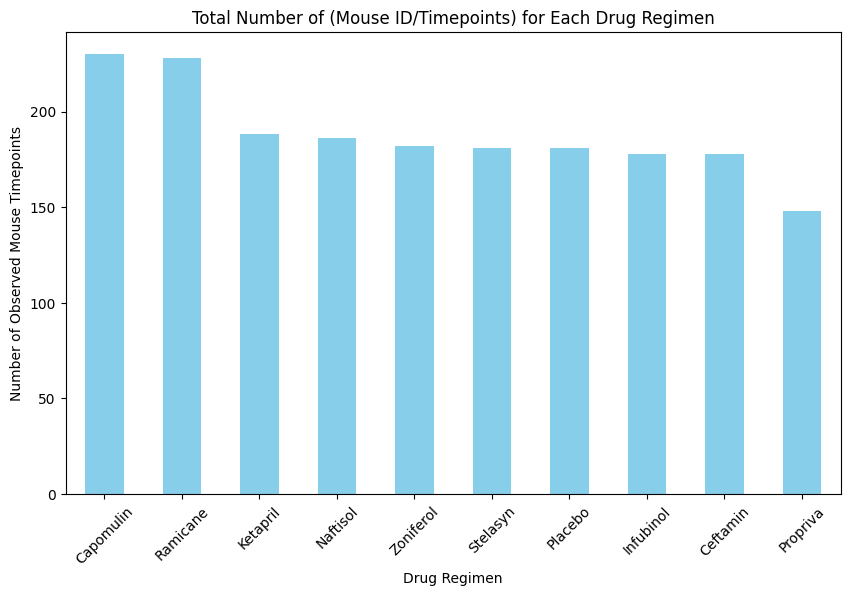

In [76]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate the bar plot using Pandas
plot = merge_mouse_unique['Drug Regimen'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', title='Total Number of (Mouse ID/Timepoints) for Each Drug Regimen')
plot.set_xlabel('Drug Regimen')
plot.set_ylabel('Number of Observed Mouse Timepoints')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

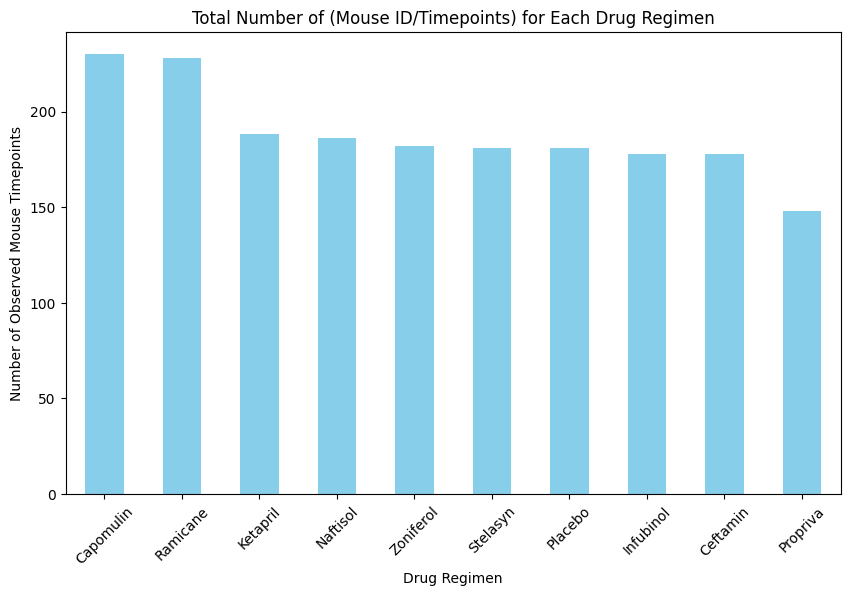

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
merge_mouse_unique['Drug Regimen'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Number of (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

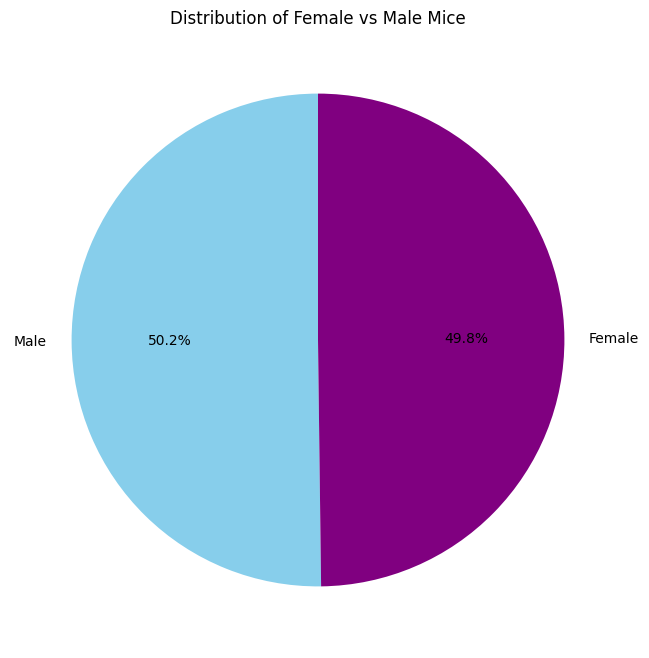

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the distribution of female versus male mice
gender_counts = mouse_metadata['Sex'].value_counts()
plot = gender_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'purple'], title='Distribution of Female vs Male Mice')
plot.set_ylabel('')  # Hide the y-label

# Show the plot
plt.show()

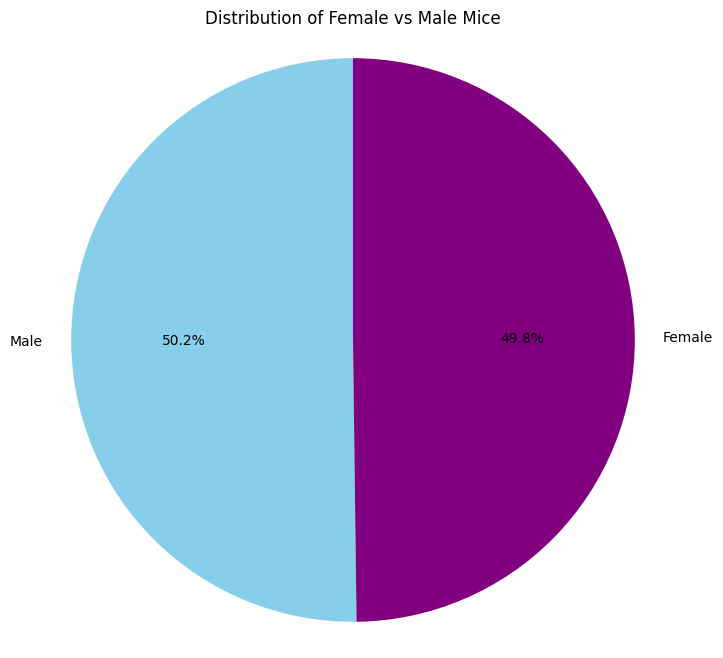

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'purple'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = merge_mouse_unique.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, merge_mouse_unique, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {treatment: [] for treatment in treatment_regimens}
for treatment in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    tumor_volumes = treatment_df['Tumor Volume (mm3)']

    # Add subset to the tumor volume
    tumor_vol_data[treatment] = tumor_volumes.tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
        
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f'{treatment} regimen:')
    print(f'Q1: {lowerq}')
    print(f'Q3: {upperq}')
    print(f'IQR: {iqr}')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    print(f'Potential outliers: {outliers.tolist()}\n')



Capomulin regimen:
Q1: 32.37735684
Q3: 40.1592203
IQR: 7.781863460000004
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Potential outliers: []

Ramicane regimen:
Q1: 31.56046955
Q3: 40.65900627
IQR: 9.098536719999998
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Potential outliers: []

Infubinol regimen:
Q1: 54.04860769
Q3: 65.52574285
IQR: 11.477135160000003
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Potential outliers: [36.3213458]

Ceftamin regimen:
Q1: 48.72207785
Q3: 64.29983003
IQR: 15.577752179999997
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Potential outliers: []



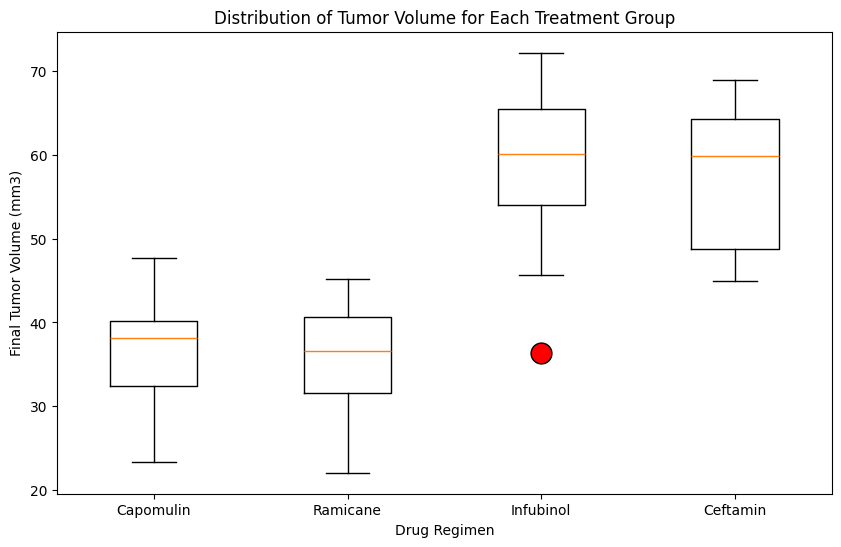

In [82]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Customizing the appearance of the fliers (outliers)
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=15)

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data.values(), tick_labels=treatment_regimens, flierprops=flierprops)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

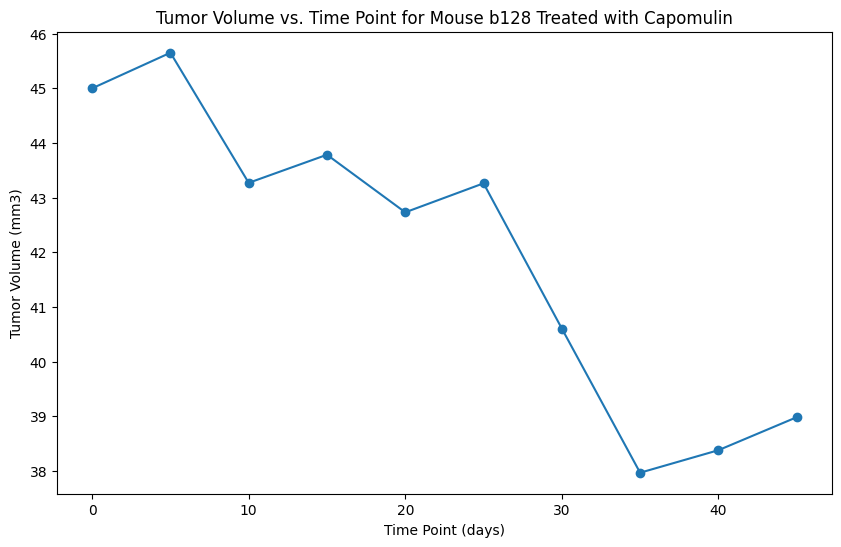

In [83]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
capomulin_df = merge_mouse_unique[merge_mouse_unique['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin 
single_mouse_id = capomulin_df['Mouse ID'].iloc[0]
single_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == single_mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)
plt.show()

,Mouse ID,Average Tumor Volume (mm3)
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344
5,i557,44.805810
6,i738,39.141053
7,j119,44.465236
8,j246,43.216925
9,l509,44.434474


,Mouse ID,Average Tumor Volume (mm3),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,41.963636,0,45.000000,0,Capomulin,Female,9,22
1,b128,41.963636,5,45.651331,0,Capomulin,Female,9,22
2,b128,41.963636,10,43.270852,0,Capomulin,Female,9,22
3,b128,41.963636,15,43.784893,0,Capomulin,Female,9,22
4,b128,41.963636,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
225,y793,38.506829,25,38.992734,2,Capomulin,Male,17,17
226,y793,38.506829,30,35.726023,2,Capomulin,Male,17,17
227,y793,38.506829,35,36.327870,2,Capomulin,Male,17,17
228,y793,38.506829,40,31.475411,2,Capomulin,Male,17,17


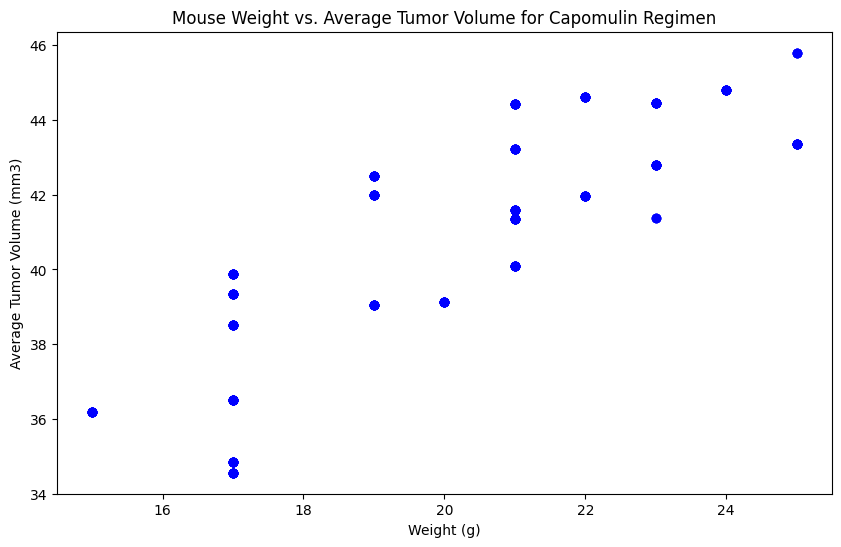

In [84]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for mice treated with Capomulin
capomulin_study_df = merge_mouse_unique[merge_mouse_unique['Drug Regimen'] == 'Capomulin']


# Calculate the average observed tumor volume for each mouse
avg_tumor_volume_df = capomulin_study_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume_df = avg_tumor_volume_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
display(avg_tumor_volume_df)
# Merge the average tumor volume data with the mouse metadata to get the weights
merged_capomulin_df = pd.merge(avg_tumor_volume_df, merge_mouse_unique, on='Mouse ID')
display(merged_capomulin_df)
# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Average Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8343958614425957


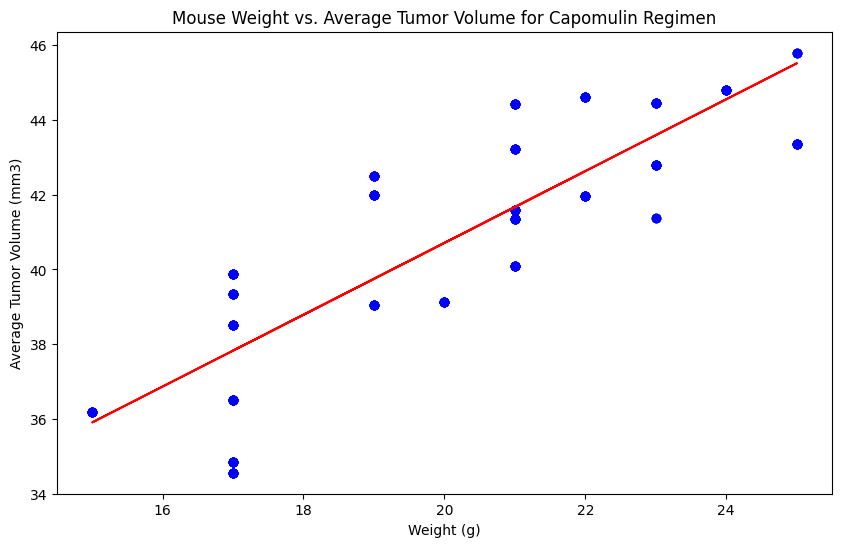

Slope: 0.9609669432428362
Intercept: 21.48982721329954
R-squared: 0.6962164535925314
P-value: 6.495737656135933e-61
Standard error: 0.04203886745939214


In [85]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation = merged_capomulin_df['Weight (g)'].corr(merged_capomulin_df['Average Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Average Tumor Volume (mm3)'])

# Generate the regression line
regression_line = slope * merged_capomulin_df['Weight (g)'] + intercept

# Generate the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Average Tumor Volume (mm3)'], color='blue', label='Data points')
plt.plot(merged_capomulin_df['Weight (g)'], regression_line, color='red', label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()

# Display the regression details
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')
print(f'P-value: {p_value}')
print(f'Standard error: {std_err}')


I do not understand why my correlation number is different from the example in starter code.